<a href="https://colab.research.google.com/github/StephanieO-jpg/Hass-Consult/blob/master/Supervised_Learning_with_Exploratory_Data_Analysis_and_Regression_for_Hass_Consultant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


> HassConsult are Real estate agents offering property to rent, property for sale, property developments, valuation & management Services. 


> HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

> HassConsult with its wealth of experience continuously reaps new benefits from opportunities presented by changing market dynamics as well as evolving business and property cycles. As a policy, HassConsult works towards new innovations and continually brings dynamism to the industry in Kenya-be it launch of off-plan developments or introduction of versatile financial structures for property developments, which have propelled the industry into new directions.

> More on the real estate agency can be found on their website : (http://hassconsult.co.ke/real-estate/)












# 1. Define the question





## a) Specifying the Question










> I am working as a Data Scientist for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables



## b) Define the Metric of Success

## c) Understand the context 

To get a better understanding of the dataset here is a glossary of the columns:

 

*   Id
*   price  - Price of the house
*   bedrooms - Number of Bedrooms
*   bathrooms - Number of Bathrooms
*   sqft_living - Square feet area of living area
*   sqft_lot  - Square feet area of parking Layout
*   floors - Number of Floors
*   waterfront - Whether waterfront is there or not
*   view - Number of Views
*   grade - Grades
*   sqft_above
*   sqft_basement - Square feet area off basement
*   yr_built - Year the house is built
*   yr_renovated - Year the house is renovated
*   zipcode - zipcode os the house
*   lat : Latitude of the house
*   lon : Longitude of the house
*   sqft_living15
*   sqft_lot15




## d) Record the experimental design

## e) Data Relevance

# Read Data

In [0]:
# importing python libraries that will aid in the previewing tof the dataset
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
# uploading and reading the csv files that contain the dataset

url ='https://ia801407.us.archive.org/31/items/independentprojectweek7housedata/Independent%20Project%20Week%207%20-%20house_data.csv'

hass=pd.read_csv (url)
hass.take(np.random.permutation(len(hass))[:15])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11792,873900240,256000.0,4,2.50,2050,5787,2.0,0,0,3,7,2050,0,2002,0,98198,47.3527,-122.315,2030,6615
21215,1760650950,309000.0,3,2.50,1950,3825,2.0,0,0,3,7,1950,0,2013,0,98042,47.3588,-122.082,1950,3825
21296,5592200010,445000.0,3,2.50,2380,5269,2.0,0,0,3,8,2380,0,2008,0,98056,47.5066,-122.192,2150,7600
2778,2490200055,560000.0,3,3.50,2270,4088,2.0,0,0,3,8,1880,390,1996,0,98136,47.5356,-122.384,1760,5425
12908,2028701075,626000.0,3,1.00,1040,4240,1.0,0,0,4,7,860,180,1924,0,98117,47.6768,-122.367,1170,4240
15182,3438500742,399000.0,3,3.00,2240,10479,2.0,0,0,4,7,1710,530,1950,0,98106,47.5529,-122.356,1530,5244
88,1332700270,215000.0,2,2.25,1610,2040,2.0,0,0,4,7,1610,0,1979,0,98056,47.5180,-122.194,1950,2025
7535,2310030490,292500.0,3,2.25,1390,6004,2.0,0,0,3,8,1390,0,1993,0,98038,47.3536,-122.047,1630,6397
449,4140090240,520000.0,3,2.25,2590,9263,1.0,0,0,5,8,1440,1150,1977,0,98028,47.7691,-122.262,2580,9450
19223,9407001830,338000.0,5,2.00,1860,9000,2.0,0,0,3,7,1860,0,1980,0,98045,47.4484,-121.772,1390,9752


# Checking on the Data

In [10]:
# describing the data
hass.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
# confirming datatypes
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Cleaning

In [12]:
hass.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

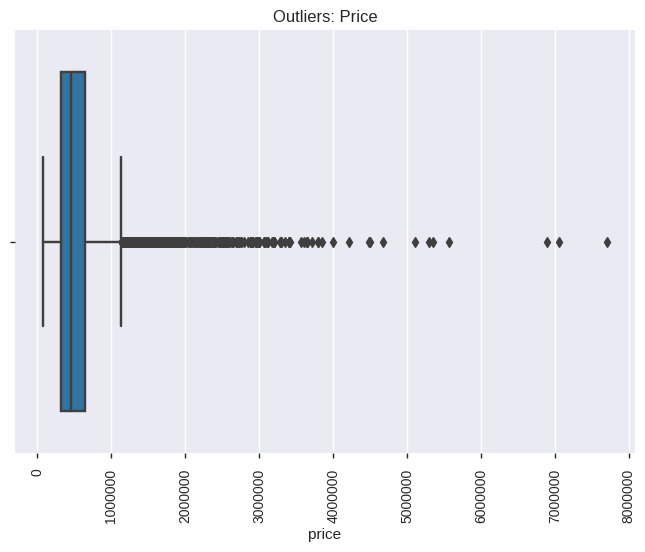

<Figure size 800x4000 with 0 Axes>

In [54]:
# check for outliers

ax = sns.boxplot(x="price", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: Price')
plt.figure(figsize = (8,40))
plt.show()

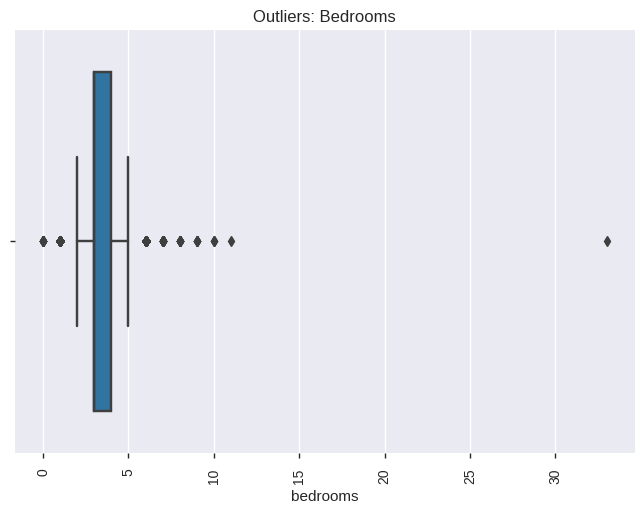

<Figure size 800x4000 with 0 Axes>

In [55]:
ax = sns.boxplot(x="bedrooms", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: Bedrooms')
plt.figure(figsize = (8,40))
plt.show()

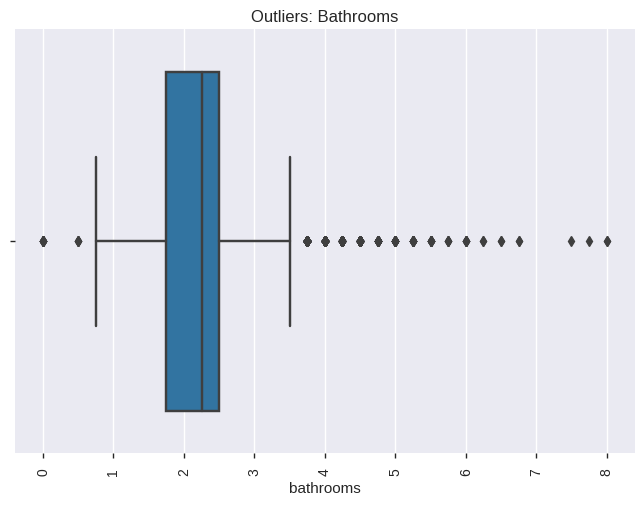

<Figure size 800x4000 with 0 Axes>

In [56]:
ax = sns.boxplot(x="bathrooms", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: Bathrooms')
plt.figure(figsize = (8,40))
plt.show()

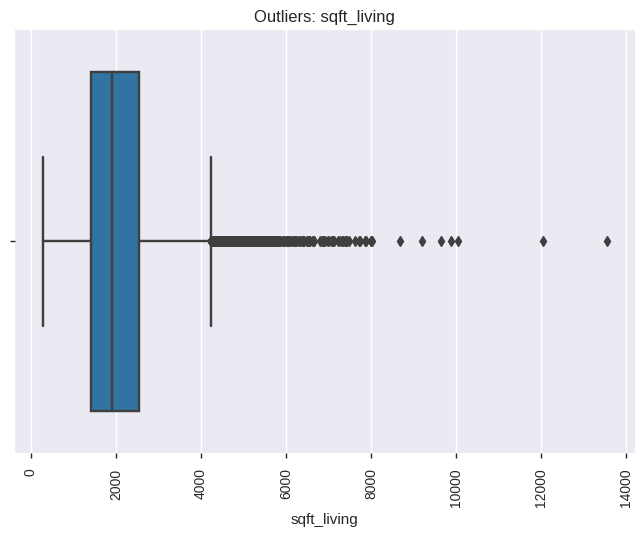

<Figure size 800x4000 with 0 Axes>

In [57]:
ax = sns.boxplot(x="sqft_living", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: sqft_living')
plt.figure(figsize = (8,40))
plt.show()

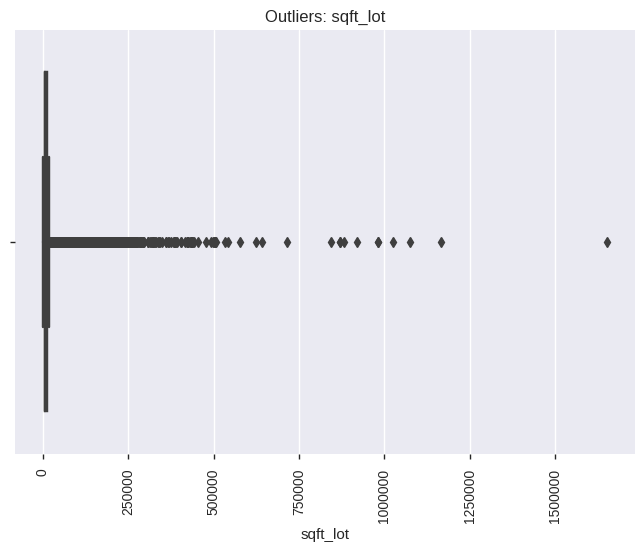

<Figure size 800x4000 with 0 Axes>

In [58]:
ax = sns.boxplot(x="sqft_lot", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: sqft_lot')
plt.figure(figsize = (8,40))
plt.show()

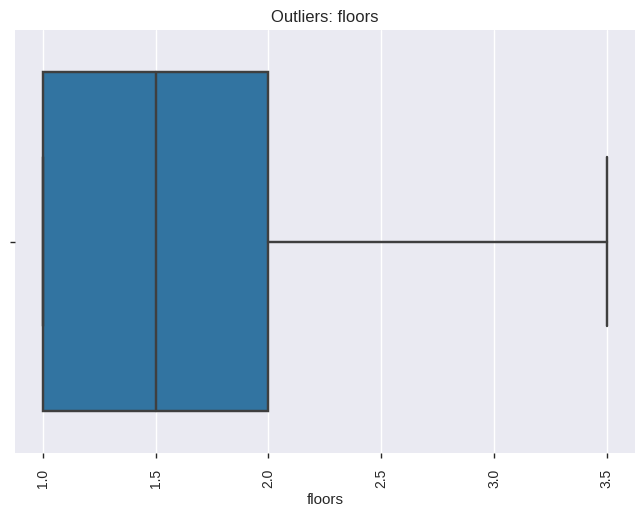

<Figure size 800x4000 with 0 Axes>

In [59]:
ax = sns.boxplot(x="floors", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: floors')
plt.figure(figsize = (8,40))
plt.show()

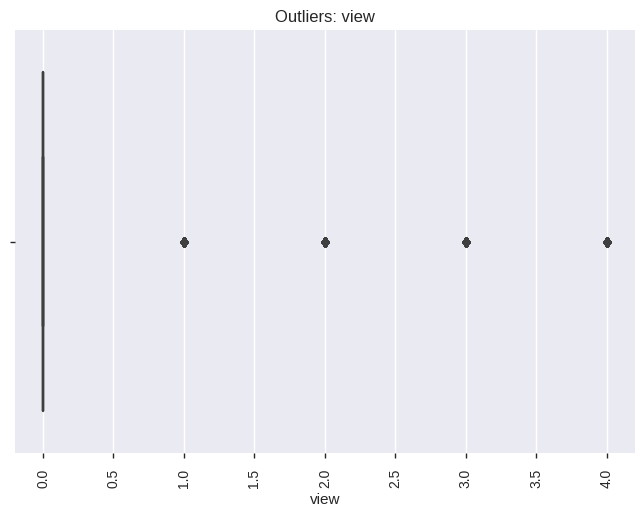

<Figure size 800x4000 with 0 Axes>

In [64]:
ax = sns.boxplot(x="view", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: view')
plt.figure(figsize = (8,40))
plt.show()

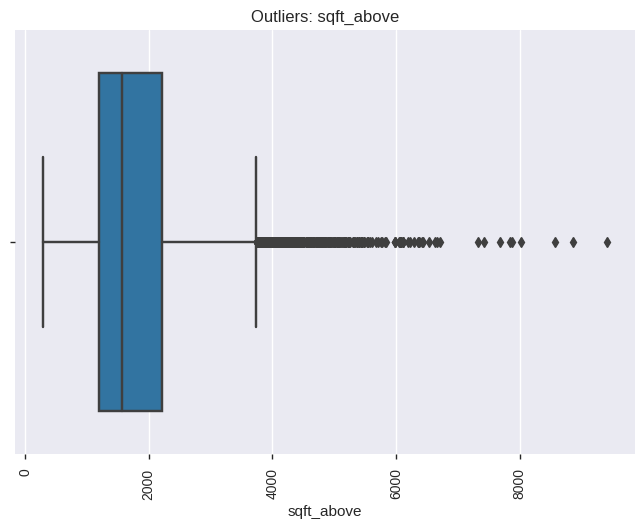

<Figure size 800x4000 with 0 Axes>

In [65]:
ax = sns.boxplot(x="sqft_above", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: sqft_above')
plt.figure(figsize = (8,40))
plt.show()

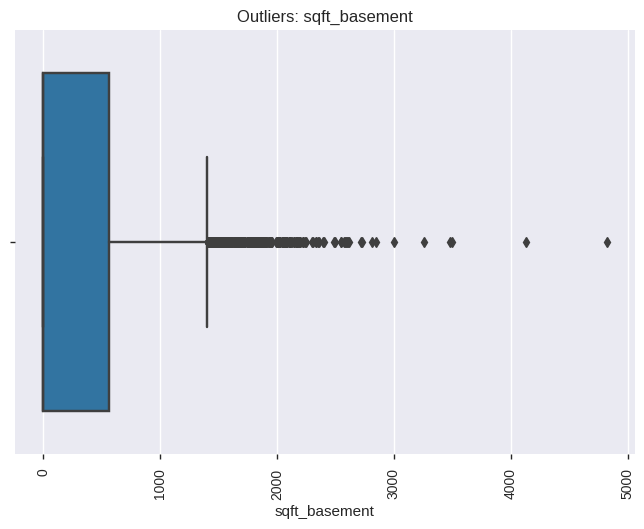

<Figure size 800x4000 with 0 Axes>

In [66]:
ax = sns.boxplot(x="sqft_basement", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: sqft_basement')
plt.figure(figsize = (8,40))
plt.show()

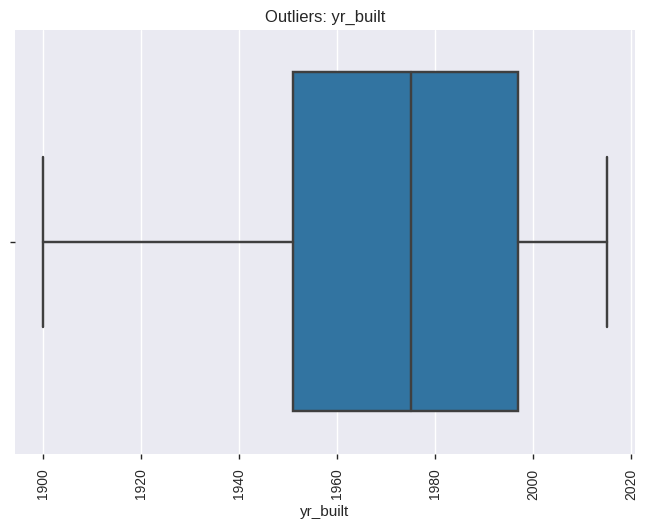

<Figure size 800x4000 with 0 Axes>

In [67]:
ax = sns.boxplot(x="yr_built", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: yr_built')
plt.figure(figsize = (8,40))
plt.show()

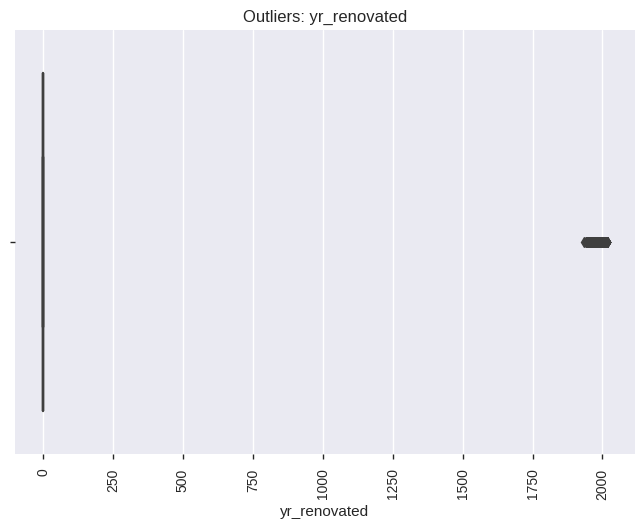

<Figure size 800x4000 with 0 Axes>

In [68]:
ax = sns.boxplot(x="yr_renovated", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: yr_renovated')
plt.figure(figsize = (8,40))
plt.show()

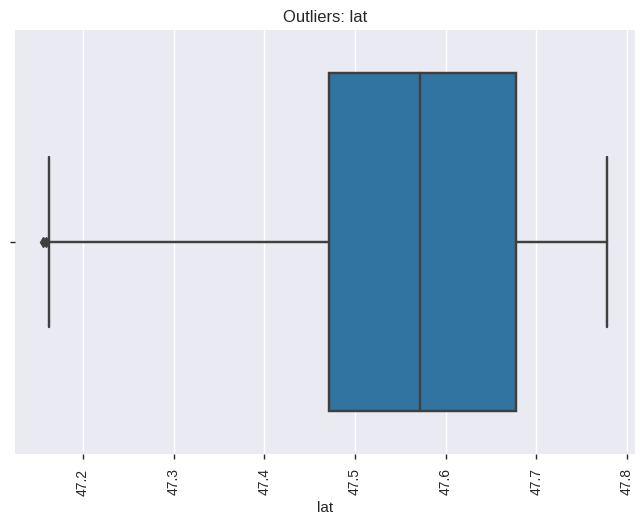

<Figure size 800x4000 with 0 Axes>

In [69]:
ax = sns.boxplot(x="lat", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: lat')
plt.figure(figsize = (8,40))
plt.show()

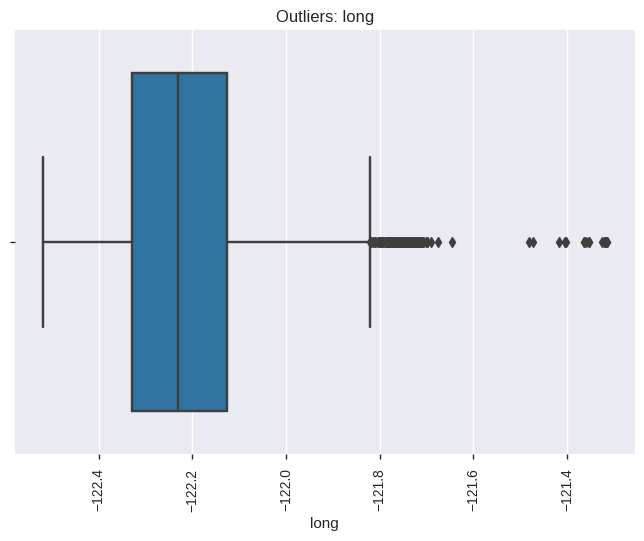

<Figure size 800x4000 with 0 Axes>

In [70]:
ax = sns.boxplot(x="long", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: long')
plt.figure(figsize = (8,40))
plt.show()

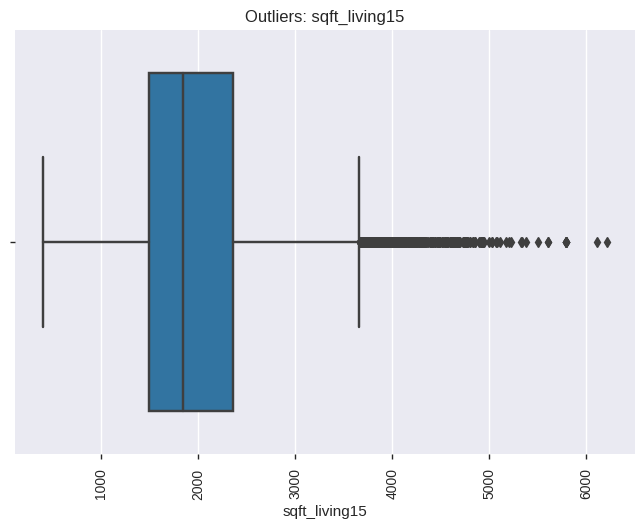

<Figure size 800x4000 with 0 Axes>

In [71]:
ax = sns.boxplot(x="sqft_living15", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: sqft_living15')
plt.figure(figsize = (8,40))
plt.show()

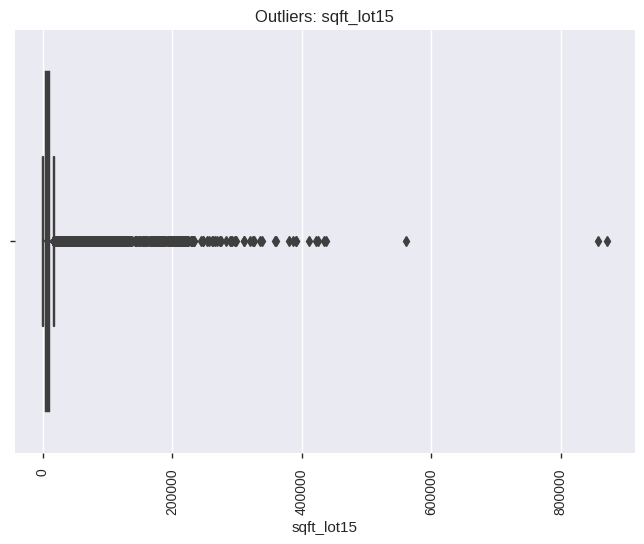

<Figure size 800x4000 with 0 Axes>

In [72]:
ax = sns.boxplot(x="sqft_lot15", data=hass)
plt.xticks(rotation = 90)
plt.title('Outliers: sqft_lot15')
plt.figure(figsize = (8,40))
plt.show()

In [73]:
# check for missing values
hass.isnull().sum().any()

False

In [74]:
# check on duplicates

hass.duplicated().sum()

3

In [75]:
# dropping the duplicates
hass = hass.drop_duplicates()
hass.duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

To make my work easier i will perform Univariate analysis with the help of pandas profiling report

In [76]:
import pandas_profiling as pp
pp.ProfileReport(hass)

Number of variables,21
Number of observations,21610
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,20
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


As seen in the report generated above, the columns view, waterfont and yr_renovated have low cardinality and will therefore be dropped 

In [0]:
hass.drop(columns=['view','waterfront','yr_renovated'],inplace=True)

### Bivariate analysis

In [80]:
#Correlation matrix.
corr = hass.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.036397,0.667478,0.605569,0.323849,0.053980,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,0.028422,0.357003,0.477619,0.303077,0.154276,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,-0.124940,0.664990,0.685351,0.283814,0.505997,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,-0.058768,0.762719,0.876600,0.435054,0.318099,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,-0.008967,0.113644,0.183527,0.015271,0.053105,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,-0.263779,0.458151,0.523874,-0.245673,0.489347,-0.059025,0.049593,0.125343,0.279861,-0.011250
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,1.000000,-0.144655,-0.158212,0.174071,-0.361347,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.008093,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,-0.144655,1.000000,0.755919,0.168443,0.446966,-0.184795,0.114086,0.198347,0.713208,0.119265
sqft_above,-0.010857,0.605569,0.477619,0.685351,0.876600,0.183527,0.523874,-0.158212,0.755919,1.000000,-0.051923,0.423922,-0.261163,-0.000823,0.343791,0.731870,0.194060


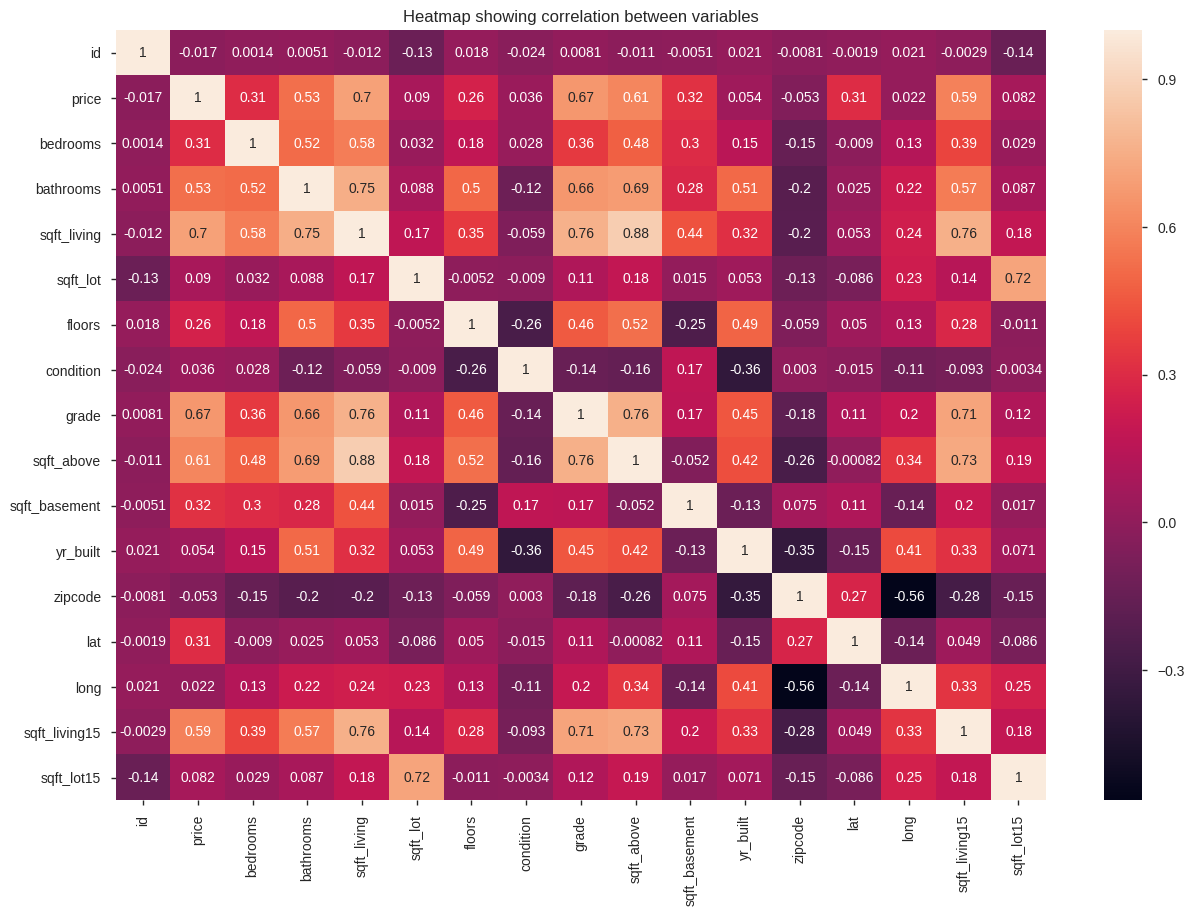

In [81]:
# a visualization of the correlation as seen above
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

# Feature Engineering

In [82]:
#Creating a new column age that will define how old the house in question is 
#
hass['age'] = 2019 - hass['yr_built']
hass.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age'],
      dtype='object')

In [0]:
# defining dependent and independent variables
X = hass.drop(['id','price', 'yr_built', 'zipcode', 'lat','long'], 1)
      
y = hass['price']

In [0]:
# training and normalizing the dataset
#Split the data into a training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
hass.shape

(21610, 18)

In [0]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
np.random.seed(0)

# train_features = X

# model = PCA(n_components=13).fit(train_features)

# # number of components
# n_pcs= model.components_.shape[0]
# # get the index of the most important feature on EACH component
# # list comprehension
# most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
# initial_feature_names = ['bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','grade','sqft_basement','yr_built','zipcode']
# # get the names
# most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# #list comprehension
# dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# # build the dataframe
# hass = pd.DataFrame(dic.items())
# hass

In [90]:
# explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.09793142e-01, 1.48575629e-01, 1.36357986e-01, 7.02407964e-02,
       5.68375759e-02, 5.23987156e-02, 4.01016928e-02, 2.58786493e-02,
       2.23066887e-02, 2.02351650e-02, 1.72739588e-02, 1.72009133e-32])

# Regression

### Multiple linear regression

In [91]:
# define the dependent and indepnedent variables
z = hass.drop(['id', 'price', 'yr_built','lat', 'long', 'zipcode'], axis= 1)
print (z.columns)

y = hass['price']

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'age'],
      dtype='object')


In [92]:
# checking whether mulitcollinearity assumptions are met
corr1 = z.corr()
corr1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,0.028422,0.357003,0.477619,0.303077,0.391633,0.029233,-0.154276
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,-0.124940,0.664990,0.685351,0.283814,0.568665,0.087191,-0.505997
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,-0.058768,0.762719,0.876600,0.435054,0.756420,0.183285,-0.318099
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,-0.008967,0.113644,0.183527,0.015271,0.144620,0.718556,-0.053105
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,-0.263779,0.458151,0.523874,-0.245673,0.279861,-0.011250,-0.489347
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,1.000000,-0.144655,-0.158212,0.174071,-0.092854,-0.003424,0.361347
grade,0.357003,0.664990,0.762719,0.113644,0.458151,-0.144655,1.000000,0.755919,0.168443,0.713208,0.119265,-0.446966
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,-0.158212,0.755919,1.000000,-0.051923,0.731870,0.194060,-0.423922
sqft_basement,0.303077,0.283814,0.435054,0.015271,-0.245673,0.174071,0.168443,-0.051923,1.000000,0.200367,0.017260,0.133062
sqft_living15,0.391633,0.568665,0.756420,0.144620,0.279861,-0.092854,0.713208,0.731870,0.200367,1.000000,0.183194,-0.326298


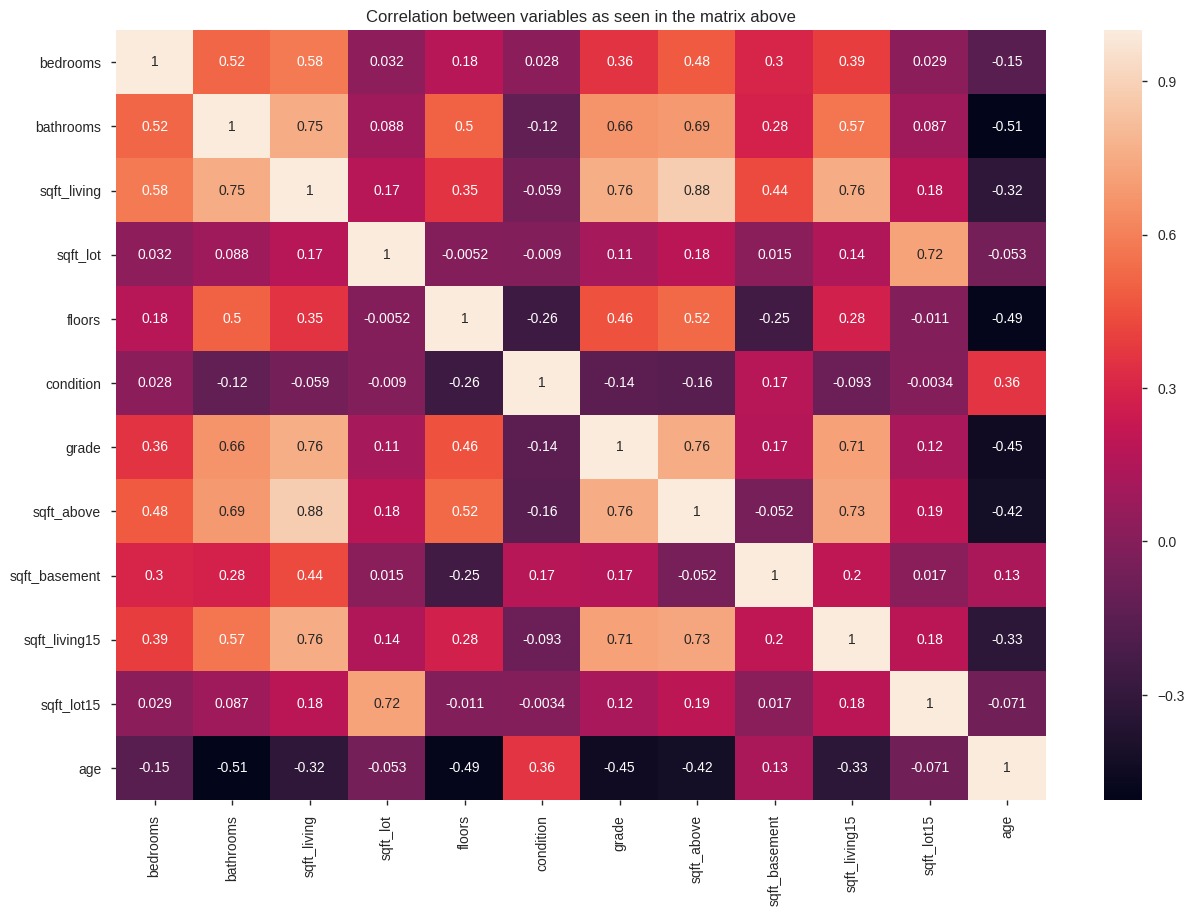

In [93]:
# a visualization of the correlation as seen above
plt.figure(figsize = (15, 10))
sns.heatmap(corr1, annot = True) 
plt.title('Correlation between variables as seen in the matrix above')
plt.show()

There is relatively high correlation and to reduce this we will go ahead and drop more columns

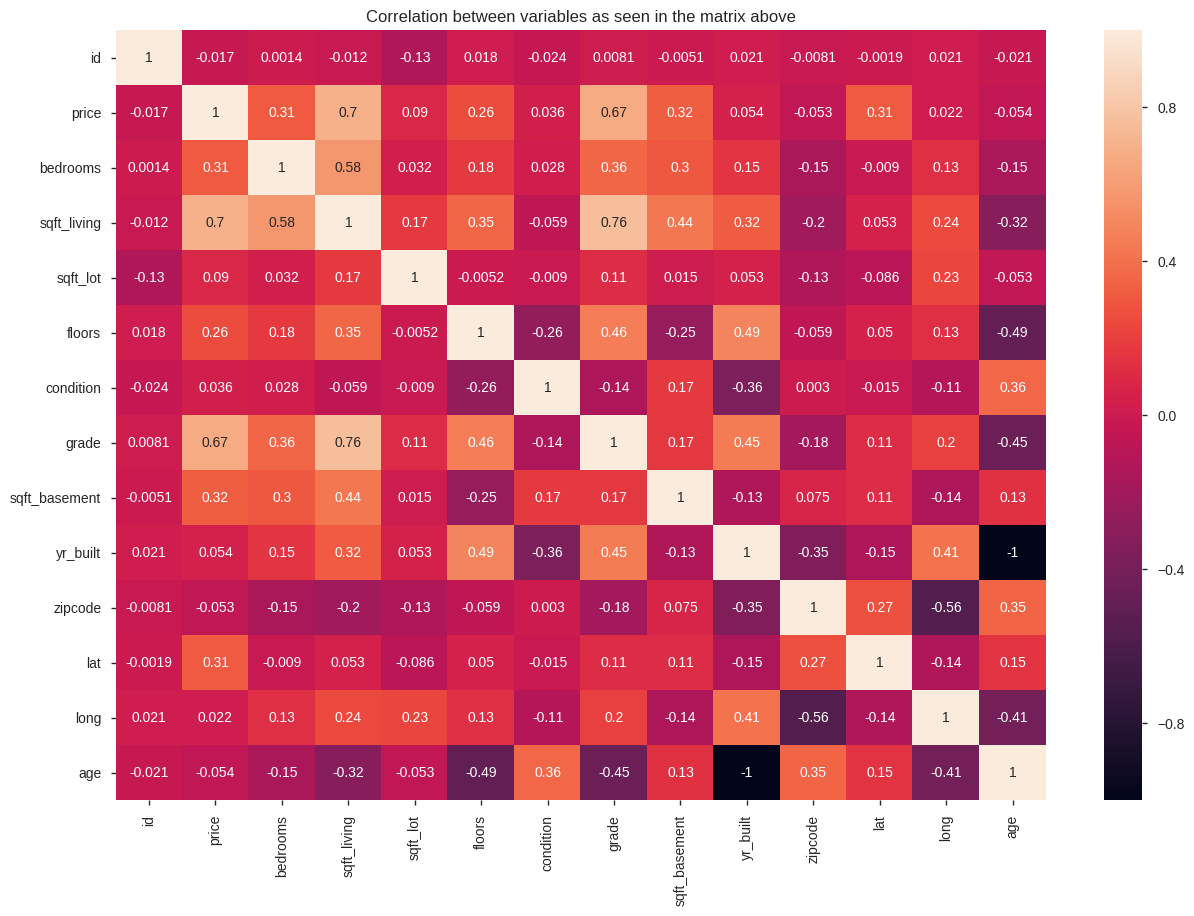

In [94]:
b = hass.drop(['sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms'], axis= 1)
y = hass['price']
corr2 = b.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr2, annot = True) 
plt.title('Correlation between variables as seen in the matrix above')
plt.show()

In [95]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
# Fit Linear Regression model to the dataset to create a baseline model to compare the linear and polynomial regression model)

regressor = linear_model.LinearRegression(fit_intercept = True, normalize = True)
regressor.fit(X, y)
# This is our prediction for admission based on our model
print('Intercept: \n', regressor.intercept_)
#The coefficients represent the contribution of the predictor variables in creating the model
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -1080544.5687240027
Coefficients: 
 [-4.93867615e+04  5.00934213e+04  8.83879777e+01  1.07712598e-02
  3.35532714e+04  1.90135546e+04  1.24728916e+05  7.81932497e+01
  1.06905299e+02  3.62922527e+01 -5.06290822e-01  3.97212088e+03]


In [96]:
#splitting the dataset into train and test.
#the test data is 33% while the train data is 67%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(b, y, random_state=42, test_size=.33)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lr = ensemble.GradientBoostingRegressor()
model = lr.fit(X_train, y_train)
print ("Accuracy Score is: \n", model.score(X_test, y_test))

Accuracy Score is: 
 0.9986018482922573


the model's accuracy is seen to be too high meaning it might over fit

In [98]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


RMSE is: 
 191350880.4802028


the rmse is is also too high, confirming the fact that our model is too perfect

Text(0.5, 1.0, 'Linear Regression Model')

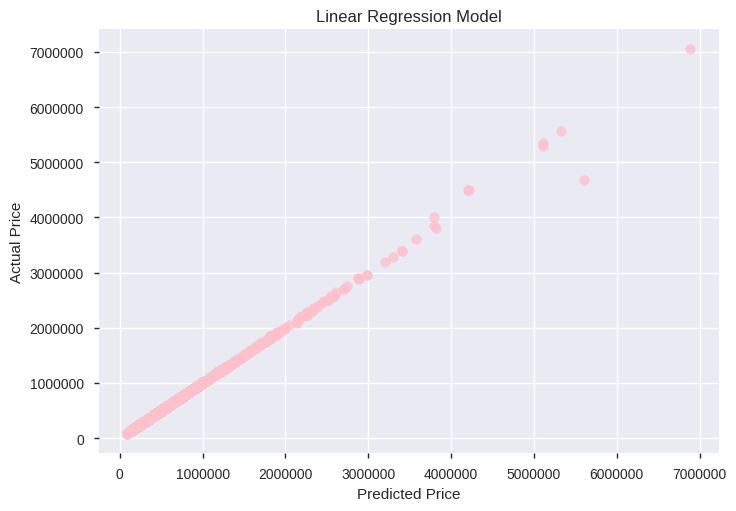

In [99]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='pink') 
#alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')


Text(0.5, 1.0, 'Linear Regression Model')

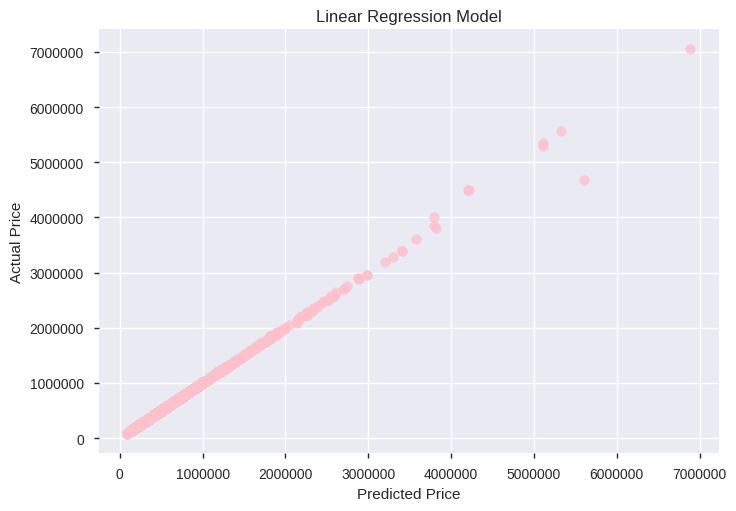

In [100]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='pink')
 #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()


In [157]:
# Plotting the prediction errors
# checking for heteroskedasticity
y_pred = res.predict(X)

residuals = np.subtract(y_pred, y_test)
plt.scatter(y_pred, residuals, color='pink')
plt.title('Residual Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= float(residuals.mean()), color='black')
plt.show()

NameError: ignored

In [156]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# reject null value if test result is greater than critcal val. Will be evidet when patterns to variance are seen
# when no patterns are observed, and we accept the null hypothesis that the variance is homogeneous across our data
if (test_result > critical_value):

  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### Quantile reg

In [0]:
#Separating training and testing datasets
w = z.drop(['condition', 'grade'], 1) 
y = hass['price']

from sklearn.model_selection import train_test_split
w_train, w_test, y_train, y_test = train_test_split(w,y, test_size=0.33, random_state=24)

In [161]:
import statsmodels.formula.api as smf


# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y_train ~ w_train', hass)
res = mod.fit(q=.5)

  # Then print out the summary of our model
  #
print(res.summary())

PatsyError: ignored

In [162]:
# 
y_pred = res.predict(b)

# To compare the actual output values for X_test with the predicted values
# 
w1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
w1

NameError: ignored

In [163]:
# algorithm evaluation

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

ValueError: ignored

In [164]:
from sklearn.metrics import r2_score
w=r2_score(y, y_pred)
w

ValueError: ignored

### Ridge

In [0]:
# defining independent and dependent variables for the model
u =  hass.drop(['id', 'price', 'yr_built', 'lat', 'long', 'zipcode'], axis= 1)
y = hass['price']

In [113]:
#  Splitting the dataset into training and testing sets
# training the set

u_train, u_test, y_train, y_test = train_test_split(u, y, test_size = 0.02, random_state = 101)
# Training the model
#
ridge = Ridge(normalize=True)
ridge.fit(u_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred = ridge.predict(u_test)

# To compare the actual output values for X_test with the predicted values
# 
u1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
u1


In [165]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 143437.99122675197
Mean Squared Error: 52473794573.7177
Root Mean Squared Error: 229071.59268167167


In [166]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6298957829830307

In [117]:
# hyperparameter tuning using gridsearch
# fitting the model
# identufying best parameters

ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

search.fit(u,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 0.01}


51909809733.48158

In [118]:
# Training the model with the alpha value that we have just obtained
#
ridge = Ridge(normalize=True, alpha = 0.01 )
ridge.fit(u_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [119]:
y_pred = ridge.predict(u_test)

# To compare the actual output values for X_test with the predicted values
# 
u2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
u2

,Actual,Predicted
21202,450800.0,6.418088e+05
8457,350000.0,3.249117e+05
1611,378000.0,3.542302e+05
9736,292000.0,3.993401e+05
11752,302500.0,4.653384e+05
...,...,...
10058,620000.0,5.213839e+05
16663,470000.0,5.922317e+05
3515,299950.0,4.721928e+05
8886,920000.0,1.032302e+06


In [120]:
# evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 124567.70998563402
Mean Squared Error: 28486979875.00675
Root Mean Squared Error: 168780.863473934


In [121]:
from sklearn.metrics import r2_score
u= r2_score(y_test, y_pred)
u

0.6599849781102634

In [167]:
# cross validation
# number of folds 10
scores = cross_val_score(ridge, u, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'The mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'The Stddev of the cross validation scores is {np.round(scores.std(), 3)}')

TypeError: ignored

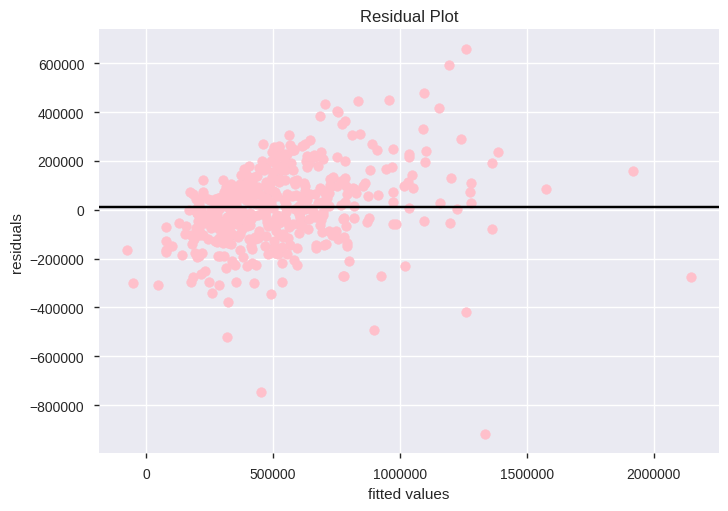

In [123]:
# residual plot
residuals = np.subtract(y_pred, y_test)
plt.scatter(y_pred, residuals, color='pink')
plt.title('Residual Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= float(residuals.mean()), color='black')
plt.show()

In [124]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# reject null value if test result is greater than critcal val. Will be evidet when patterns to variance are seen
# when no patterns are observed, and we accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, therefore theres need for re-evaluation')
else:
  print('The variances are homogeneous!')



inf
The variances are homogeneous!


### Lasso

In [0]:
v =  hass.drop(['sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms'], axis=1)

y = hass['price']

In [126]:
# Splitting the dataset into training and testing sets
#

v_train, v_test, y_train, y_test = train_test_split(v, y, test_size = 0.33, random_state = 101)

# Training the model
#
lasso = Lasso(normalize=True)
lasso.fit(v_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [127]:
search.fit(v,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05}


39.48670111723466

In [128]:
#training the model w obtained alpha
lasso = Lasso(normalize=True, alpha =1e-05 )
lasso.fit(v_train, y_train)


Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
y_pred = lasso.predict(v_test)
y_pred

# To compare the actual output values for P_test with the predicted values
# 
v2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
v2

,Actual,Predicted
21202,450800.0,450809.040624
8457,350000.0,350026.557865
1611,378000.0,378023.571780
9736,292000.0,292021.223980
11752,302500.0,302498.768972
...,...,...
14173,286000.0,285988.391548
86,305000.0,304982.429203
511,480000.0,479986.251308
18329,424305.0,424342.644979


In [130]:
# evaluation 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.461976338330592
Mean Squared Error: 371.7557114224888
Root Mean Squared Error: 19.280967595597705


In [131]:
from sklearn.metrics import r2_score
v = r2_score(y_test, y_pred)
v

0.9999999972446502

In [132]:
# Performing cross validation
# number of folds is 10
scores = cross_val_score(lasso, v, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores

print(f'The mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'The Stddev of the cross validation scores is {np.round(scores.std(), 3)}')

TypeError: ignored

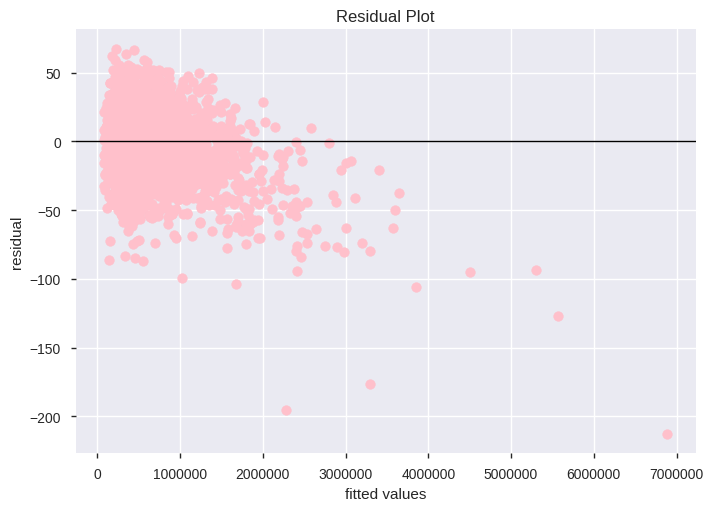

In [135]:
# residuals plot
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='pink')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='black', linewidth=1)
plt.show()

In [137]:
# bartlett test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# reject null value if test result is greater than critcal val. Will be evidet when patterns to variance are seen
# when no patterns are observed, and we accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and therefore re evaluation is needed')
else:
  print('the variances are homogeneous')

inf
the variances are homogeneous


### Elastic net

In [0]:
# variable definition
r = hass.drop(['id', 'price', 'yr_built', 'lat', 'long', 'zipcode'], axis=1)
r.columns

y = hass['price']

In [142]:
# Splitting the dataset into training and testing sets
# training the dataset4
r_train, r_test, y_train, y_test = train_test_split(r, y, test_size = 0.20, random_state = 101)

elastic = ElasticNet(normalize=True)
elastic.fit(r_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
# prediction

y_pred = elastic.predict(r_test)

# To compare the actual output values for X_test with the predicted values
# 
r1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r1

,Actual,Predicted
21202,450800.0,537991.160375
8457,350000.0,537735.363114
1611,378000.0,537854.332029
9736,292000.0,537794.801898
11752,302500.0,537920.735761
...,...,...
6793,800000.0,538096.258351
319,268750.0,537712.035699
5455,719000.0,537885.214262
20789,504058.0,538021.893595


In [144]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 237646.2207203457
Mean Squared Error: 141839306967.2038
Root Mean Squared Error: 376615.5957567395


In [145]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.00041032049966505113

In [0]:
# hyperparameter tuning
elastic = ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [147]:
# fitting of model
# obtaining best parameters
search.fit(r,y)
print (search.best_params_)
abs(search.best_score_)


{'alpha': 1e-05}


52319923150.97918

In [148]:
# training model with the bnew parameters
elastic = ElasticNet(normalize=True, alpha =1e-05)
elastic.fit(r_train, y_train)


ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [149]:
y_pred = elastic.predict(r_test)

# To compare the actual output values for X_test with the predicted values
# 
r2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r2

,Actual,Predicted
21202,450800.0,627656.944744
8457,350000.0,320547.140896
1611,378000.0,366020.690460
9736,292000.0,403979.909452
11752,302500.0,471938.277124
...,...,...
6793,800000.0,806081.088339
319,268750.0,111324.596875
5455,719000.0,698312.711590
20789,504058.0,612380.717435


In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 143437.99122675197
Mean Squared Error: 52473794573.7177
Root Mean Squared Error: 229071.59268167167


In [151]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
r

0.6298957829830307

In [158]:
# cross validation
# number of folds 10
scores = cross_val_score(elastic, r, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'The mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'The Stddev of the cross validation scores is {np.round(scores.std(), 3)}')

TypeError: ignored

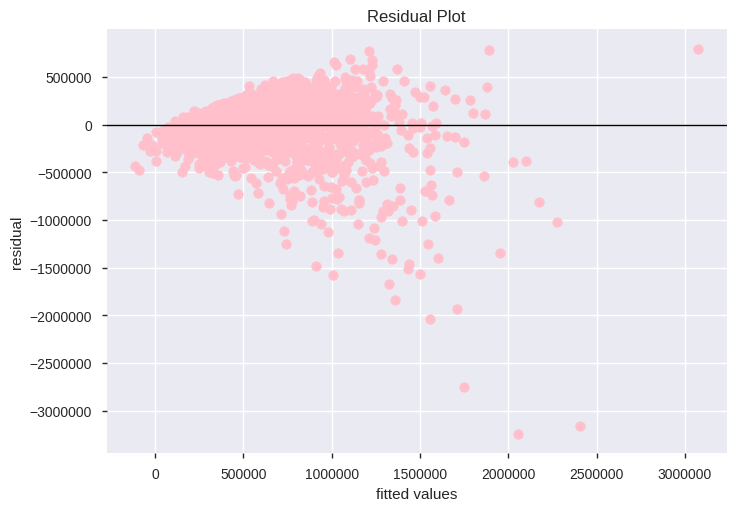

In [153]:
# residuals plot
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='pink')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='black', linewidth=1)
plt.show()

In [154]:
# bartletts test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


# reject null value if test result is greater than critcal val. Will be evidet when patterns to variance are seen
# when no patterns are observed, and we accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous')

inf
the variances are homogeneous


In [155]:
#Models vs r2 score.
models = ['multivariate', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [z,w,u,v,r]
versus = pd.DataFrame({'models': models, 'r2_scores': r2_scores})
versus

,models,r2_scores
0,multivariate,bedrooms bathrooms sqft_living ... ...
1,quantile,bedrooms bathrooms sqft_living ... ...
2,ridge,0.659985
3,lasso,1
4,elastic,0.629896


To conclude, i found that my model was a bit erroneous and there will be need for improvement